In [1]:
# Standard libraries for data analysis and visualization

import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
import pandas as pd
from scipy.stats import norm, skew 
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# SKlearn modules for data processing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# SKlearn modules for model selection 

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import tree

# SKlearn modules for model evaluations
from sklearn import metrics
from sklearn.pipeline import Pipeline 
from sklearn.pipeline import _name_estimators
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.base import clone
import operator
import math

# my class with some especific recurrent methods
import importlib
import formulas
importlib.reload(formulas)

<module 'formulas' from '/Users/pedrobustillo/AI_Business/Python_ML/formulas.py'>

# Cereals

In [2]:
# the data base is:
columns = pd.read_excel("../../AI_Business/python-ml-course-master/datasets/cereals/Cereal data columns.xlsx", header=None)
df = pd.read_csv("../../AI_Business/python-ml-course-master/datasets/cereals/Cereal data.txt", sep=" ")
df.columns = columns[0].tolist()


In [3]:
# Since -1 means NA, we have to replace all -1 for the column's mean.
df["Cups"] = df["Cups"].replace(-1,np.mean(df["Cups"]))
df["weight"] = df["weight"].replace(-1,np.mean(df["weight"]))
df["potass"] = df["potass"].replace(-1,np.mean(df["potass"]))
df["sugars"] = df["sugars"].replace(-1,np.mean(df["sugars"]))
df["carbo"] = df["carbo"].replace(-1,np.mean(df["carbo"]))
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,shelf,potass,vitamins,weight,Cups
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,3,135.000000,0,1.0,0.590658
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,3,320.000000,25,1.0,0.330000
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,3,330.000000,25,1.0,0.500000
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,3,93.657895,25,1.0,0.750000
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,1,70.000000,25,1.0,0.750000


In [4]:
# A general analysis of the data

In [5]:
data=formulas.ExploringData(df)
data.basic_database()
data.missing_values()

Number of elements: 1140
Dimension: 2
Rows, Columns: (76, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      76 non-null     object 
 1   mfr       76 non-null     object 
 2   type      76 non-null     object 
 3   calories  76 non-null     int64  
 4   protein   76 non-null     int64  
 5   fat       76 non-null     int64  
 6   sodium    76 non-null     int64  
 7   fiber     76 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  shelf     76 non-null     int64  
 11  potass    76 non-null     float64
 12  vitamins  76 non-null     int64  
 13  weight    76 non-null     float64
 14  Cups      76 non-null     float64
dtypes: float64(6), int64(6), object(3)
memory usage: 9.0+ KB
Database information None

Empty DataFrame
Columns: [Missing Values, % Missing Values]
Index: []

name       

In [6]:
# some key information
manufactures = np.unique(df["mfr"])
print("The Manifacturers are: \n")
print(manufactures)
print()
# A=American Home Food Product, G=General Mills, K=Kelloggs, N= Nabisco, P=Post, Q=Quaquer Oats, R=Ralston Purina
type = np.unique(df["type"])
print("The Cereals type are: \n")
print(type)
print()
# c = cold, h = hot
weight = np.unique(df["weight"])
print("The Cereals weights per bowl are: \n")
print(weight )

The Manifacturers are: 

['A' 'G' 'K' 'N' 'P' 'Q' 'R']

The Cereals type are: 

['C' 'H']

The Cereals weights per bowl are: 

[0.5        0.83       0.97736842 1.         1.25       1.3
 1.33       1.5       ]


In [7]:
# Lets tranform non g features to g
df["potass"]=df["potass"]/1000
df["sodium"]=df["sodium"]/1000
df["weight"]=df["weight"]*28.35

In [8]:
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,shelf,potass,vitamins,weight,Cups
0,100%_Natural_Bran,Q,C,120,3,5,0.015,2.0,8.0,8.0,3,0.135000,0,28.35,0.590658
1,All-Bran,K,C,70,4,1,0.260,9.0,7.0,5.0,3,0.320000,25,28.35,0.330000
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,0.140,14.0,8.0,0.0,3,0.330000,25,28.35,0.500000
3,Almond_Delight,R,C,110,2,2,0.200,1.0,14.0,8.0,3,0.093658,25,28.35,0.750000
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,0.180,1.5,10.5,10.0,1,0.070000,25,28.35,0.750000


In [9]:
# Calories rations:
total_calories = 9 * df["fat"] + 4 * (df["carbo"]+df["sugars"]+df["protein"])
total_calories.head(5)

0    121.0
1     73.0
2     48.0
3    114.0
4    108.0
dtype: float64

In [10]:
# A simple linear relation shows us very close coeff to the factors used above..
x = df[["fat","carbo","sugars","protein"]]
y=df["calories"]
linear=LinearRegression()
linear.fit(x,y)
print("score: ",linear.score(x,y))
print()
print("coefficients are: ", linear.coef_," and intercept: ", linear.intercept_)

score:  0.9147328962023556

coefficients are:  [8.48472535 4.04311215 3.88990592 3.40436388]  and intercept:  2.4260449723657445


In [11]:
# Lets look at weight:
# When add all the food components in grams, the result is in avg 4.5% lower than df["weight"] 
weight1 = df["protein"]+df["fat"]+df["sodium"]+df["fiber"]+df["carbo"]+df["sugars"]+df["potass"]
diff = np.around(np.mean((df["weight"]-weight1)/df["weight"]),3)
diff

0.045

In [12]:
# view per shelf
view = df.groupby(["shelf"]).mean()
view

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,Cups
shelf,,,,,,,,,,,
1,102.500000,2.650000,0.600000,0.176250,1.685000,16.586184,5.196711,0.075500,20.000000,28.109025,0.876533
2,109.523810,1.904762,1.000000,0.145714,0.904762,13.619048,9.619048,0.062317,23.809524,28.795500,0.872444
3,108.857143,2.828571,1.257143,0.159429,2.942857,14.771429,6.542857,0.128247,35.714286,30.030537,0.667256


In [13]:
calories_shelf = [df.loc[df["shelf"]==1,"calories"],df.loc[df["shelf"]==2,"calories"],df.loc[df["shelf"]==3,"calories"]]
fiber_shelf = [df.loc[df["shelf"]==1,"fiber"],df.loc[df["shelf"]==2,"fiber"],df.loc[df["shelf"]==3,"fiber"]]
sugar_shelf = [df.loc[df["shelf"]==1,"sugars"],df.loc[df["shelf"]==2,"sugars"],df.loc[df["shelf"]==3,"sugars"]]

3    35
2    21
1    20
Name: shelf, dtype: int64
[3, 2, 1]


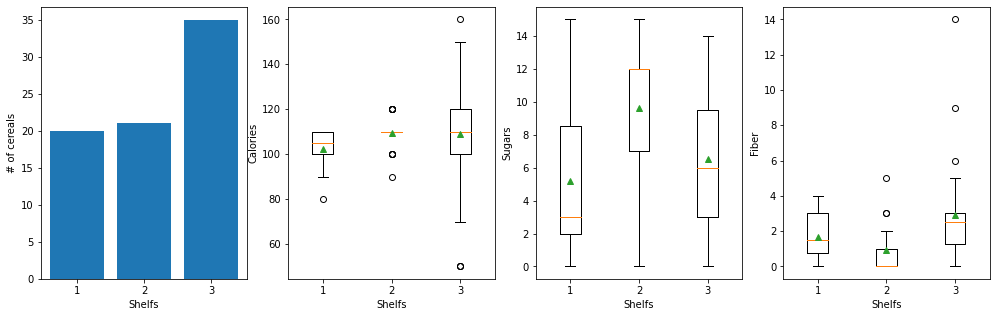

In [14]:
values = df["shelf"].value_counts()
print(values)
unique=df["shelf"].unique().tolist()
unique.sort(reverse=True)
print(unique)
plt.figure(figsize=(17,5))
plt.subplot(141)
plt.bar(unique,values)
plt.xlabel("Shelfs")
plt.ylabel("# of cereals")
plt.subplot(142)
plt.boxplot(calories_shelf,labels=unique.sort(),showmeans=True)
plt.xlabel("Shelfs")
plt.ylabel("Calories")
plt.subplot(143)
plt.boxplot(sugar_shelf,labels=unique.sort(),showmeans=True)
plt.xlabel("Shelfs")
plt.ylabel("Sugars")
plt.subplot(144)
plt.boxplot(fiber_shelf,labels=unique.sort(),showmeans=True)
plt.xlabel("Shelfs")
plt.ylabel("Fiber")
plt.show()


In [15]:
view2 = df.groupby(["mfr"]).mean()
view2

,calories,protein,fat,sodium,fiber,carbo,sugars,shelf,potass,vitamins,weight,Cups
mfr,,,,,,,,,,,,
A,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,2.000000,0.095000,25.000000,28.350000,0.590658
G,111.363636,2.318182,1.363636,0.200455,1.272727,14.727273,7.954545,2.136364,0.085227,35.227273,29.741727,0.875000
K,108.695652,2.652174,0.608696,0.174783,2.739130,15.130435,7.565217,2.347826,0.103043,34.782609,30.556370,0.760492
N,90.000000,2.600000,0.000000,0.019000,2.800000,18.200000,1.000000,1.400000,0.107732,5.000000,27.386100,0.704263
P,108.888889,2.444444,0.888889,0.146111,2.777778,13.222222,8.777778,2.444444,0.113889,25.000000,30.177000,0.714444
Q,95.000000,2.625000,1.750000,0.092500,1.337500,11.965461,6.241776,2.375000,0.074375,12.500000,24.806250,0.721414
R,115.000000,2.500000,1.250000,0.198125,1.875000,17.625000,6.125000,2.000000,0.101082,25.000000,28.189599,0.768914


In [16]:
calories_mfr = [df.loc[df["mfr"]=="K","calories"],df.loc[df["mfr"]=="G","calories"],df.loc[df["mfr"]=="P","calories"],df.loc[df["mfr"]=="Q","calories"]]
fiber_mfr = [df.loc[df["mfr"]=="K","fiber"],df.loc[df["mfr"]=="G","fiber"],df.loc[df["mfr"]=="P","fiber"],df.loc[df["mfr"]=="Q","fiber"]]
sugar_mfr = [df.loc[df["mfr"]=="K","sugars"],df.loc[df["mfr"]=="G","sugars"],df.loc[df["mfr"]=="P","sugars"],df.loc[df["mfr"]=="Q","sugars"]]

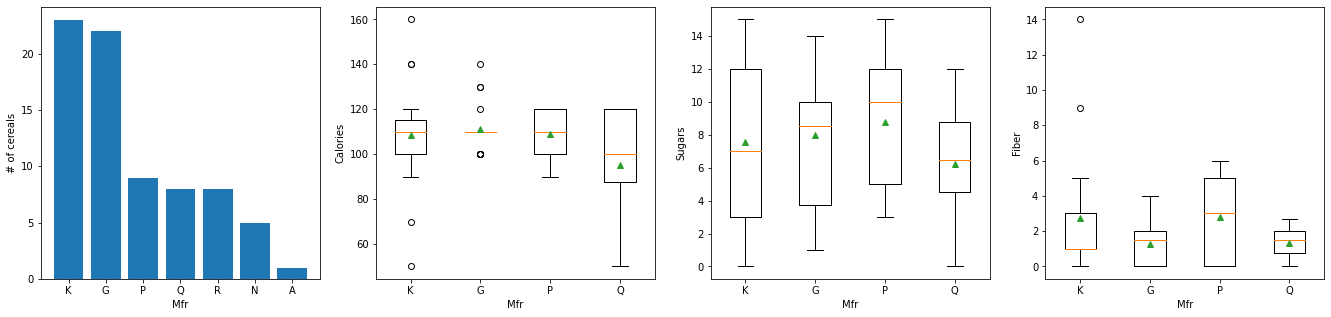

In [17]:
# Volume distribution by manufacture. 
values2 = df["mfr"].value_counts()
unique2 = df["mfr"].value_counts().index
plt.figure(figsize=(23,5))
plt.subplot(141)
plt.bar(unique2,values2)
plt.xlabel("Mfr")
plt.ylabel("# of cereals")
# Lets look at the 4 largest in volume.
plt.subplot(142)
plt.boxplot(calories_mfr,labels=unique2[:4],showmeans=True)
plt.xlabel("Mfr")
plt.ylabel("Calories")
plt.subplot(143)
plt.boxplot(sugar_mfr,labels=unique2[0:4],showmeans=True)
plt.xlabel("Mfr")
plt.ylabel("Sugars")
plt.subplot(144)
plt.boxplot(fiber_mfr,labels=unique2[0:4],showmeans=True)
plt.xlabel("Mfr")
plt.ylabel("Fiber")
plt.show()

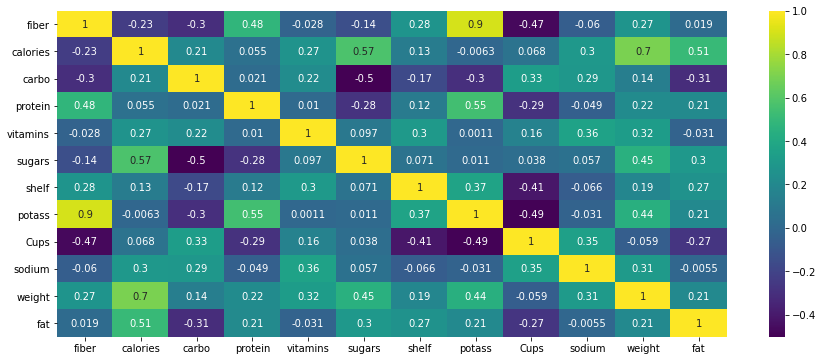

In [18]:
# Lets have a look at the features correlations
num_cols = list(set(df._get_numeric_data().columns))
corr=formulas.CorrelationMatrix(df,num_cols)
corr.correlation_matrix()

In [19]:
# Correlation = rxy (calories vs. sugars)
mean_cal, mean_sugars = np.mean(df["calories"]), np.mean(df["sugars"])
numerator = np.sum((df["calories"]-mean_cal)*(df["sugars"]-mean_sugars))/len(df)
denominator = np.std(df["calories"])* np.std(df["sugars"])
rxy = numerator / denominator
rxy

0.5743039945536158

Clustering K-means, K-means ++

Lets try to assess whether each shelf represents a cluster.

In [20]:
from sklearn.cluster import KMeans
# Copy the original dataset and drop 'type' and 'name' (I will not use them)
df1 = df.copy()
df1 = df1.drop("type",axis=1)
df1 = df1.drop("name",axis=1)
# drop 'mfr' and 'shelf' ( I will not use them as clusters features)
df1 = df1.drop("mfr", axis=1)
df1 = df1.drop("shelf", axis=1)
# Convert 'mfr' in binary variables
#df2 = pd.get_dummies(df1, columns = ["mfr"])
df1.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,Cups
0,120,3,5,0.015,2.0,8.0,8.0,0.135000,0,28.35,0.590658
1,70,4,1,0.260,9.0,7.0,5.0,0.320000,25,28.35,0.330000
2,50,4,0,0.140,14.0,8.0,0.0,0.330000,25,28.35,0.500000
3,110,2,2,0.200,1.0,14.0,8.0,0.093658,25,28.35,0.750000
4,110,2,2,0.180,1.5,10.5,10.0,0.070000,25,28.35,0.750000


In [21]:
# Convert feature's values using standard scaling:
from sklearn.preprocessing import MinMaxScaler
df1_n = df1.copy()
scaler = MinMaxScaler()
scaler.fit(df1_n.values)
values_n = scaler.transform(df1_n.values)
df1_n[df1_n.columns]=values_n
df1_n.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,Cups
0,0.636364,0.4,1.0,0.046875,0.142857,0.06250,0.533333,0.380952,0.00,0.5,0.272526
1,0.181818,0.6,0.2,0.812500,0.642857,0.00000,0.333333,0.968254,0.25,0.5,0.064000
2,0.000000,0.6,0.0,0.437500,1.000000,0.06250,0.000000,1.000000,0.25,0.5,0.200000
3,0.545455,0.2,0.4,0.625000,0.071429,0.43750,0.533333,0.249708,0.25,0.5,0.400000
4,0.545455,0.2,0.4,0.562500,0.107143,0.21875,0.666667,0.174603,0.25,0.5,0.400000


In [22]:
# Assign x and y (remember Clustering is unsupervised, hence it does not use a target variable)
# x: calories, sodium, fiber, potass, vitamins,
x = df1_n[["calories","sodium","fiber","vitamins"]].copy()
y = df["shelf"]
# lets separate between train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20, random_state=1, stratify=y)
# Reset index
X_train.reset_index(drop=True, inplace = True)
X_test.reset_index(drop=True, inplace = True)
Y_train.reset_index(drop=True, inplace = True)
Y_test.reset_index(drop=True, inplace = True)


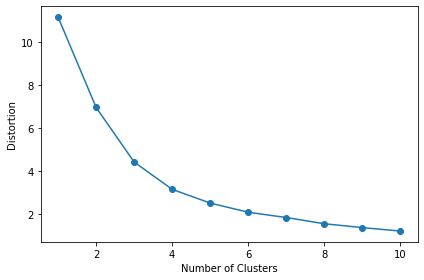

In [23]:
# Check what the optimal clusters number should be
distortions=[]
for i in range(1,11):
    km = KMeans(n_clusters = i, n_init=10, max_iter=300, tol=1e-04,random_state=1)
    km.fit(X_train)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.tight_layout()
plt.show()

In [24]:
# Lets use 3 as the number of clusters
km = KMeans(n_clusters = 3, n_init=10, max_iter=300, tol=1e-04,random_state=1)
km.fit(X_train)
label = pd.DataFrame(km.labels_.tolist(),columns=["Clusters"])
label=label+1
label["Shelfs"]=Y_train
print("Clustering score is: ", metrics.accuracy_score(label["Shelfs"],label["Clusters"]).round(3))

Clustering score is:  0.333
